# Initial codes

This notebook illustrates how Bayesian inference can be used to infer response rates of each group (basket) in a Basket trial.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, TrueResponseSite
from pyBasket.common import DEFAULT_EFFICACY_CUTOFF, DEFAULT_FUTILITY_CUTOFF, \
    MODEL_INDEPENDENT, MODEL_BHM, MODEL_PYBASKET

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 1

### Generate data

In [8]:
K = 6    # the number of groups
p0 = 0.2 # null response rate
p1 = 0.4 # target response rate

true_response_rates = [p0, p0, p0, p0, p0, p0]
enrollment = [14, 10]
sites = [TrueResponseSite(k, true_response_rates[k], enrollment) for k in range(K)]

evaluate_interim = [True, True] # evaluate every interim stage
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [9]:
futility_cutoff = DEFAULT_FUTILITY_CUTOFF
efficacy_cutoff = DEFAULT_EFFICACY_CUTOFF
early_futility_stop = True
early_efficacy_stop = True

In [10]:
trial = Trial(K, p0, p1, sites, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              futility_cutoff=futility_cutoff, efficacy_cutoff=efficacy_cutoff,
              early_futility_stop=early_futility_stop,
              early_efficacy_stop=early_efficacy_stop,              
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()


########## Stage=0 ##########

Registering Group 0 (OPEN): 5/14 for Analysis independent
Registering Group 0 (OPEN): 5/14 for Analysis BHM
Registering Group 1 (OPEN): 3/14 for Analysis independent
Registering Group 1 (OPEN): 3/14 for Analysis BHM
Registering Group 2 (OPEN): 4/14 for Analysis independent
Registering Group 2 (OPEN): 4/14 for Analysis BHM
Registering Group 3 (OPEN): 4/14 for Analysis independent
Registering Group 3 (OPEN): 4/14 for Analysis BHM
Registering Group 4 (OPEN): 4/14 for Analysis independent
Registering Group 4 (OPEN): 4/14 for Analysis BHM
Registering Group 5 (OPEN): 3/14 for Analysis independent
Registering Group 5 (OPEN): 3/14 for Analysis BHM

Running inference for: independent


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, basket_p]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 2 seconds.


,prob,futile,effective
k,,,
0,0.650,False,False
1,0.253,False,False
2,0.436,False,False
3,0.462,False,False
4,0.469,False,False
5,0.241,False,False


Running inference for: BHM


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 4 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


,prob,futile,effective
k,,,
0,0.309,False,False
1,0.281,False,False
2,0.285,False,False
3,0.283,False,False
4,0.295,False,False
5,0.287,False,False



########## Stage=1 ##########

Registering Group 0 (OPEN): 6/24 for Analysis independent
Registering Group 0 (OPEN): 6/24 for Analysis BHM
Registering Group 1 (OPEN): 6/24 for Analysis independent
Registering Group 1 (OPEN): 6/24 for Analysis BHM
Registering Group 2 (OPEN): 5/24 for Analysis independent
Registering Group 2 (OPEN): 5/24 for Analysis BHM
Registering Group 3 (OPEN): 5/24 for Analysis independent
Registering Group 3 (OPEN): 5/24 for Analysis BHM
Registering Group 4 (OPEN): 4/24 for Analysis independent
Registering Group 4 (OPEN): 4/24 for Analysis BHM
Registering Group 5 (OPEN): 5/24 for Analysis independent
Registering Group 5 (OPEN): 5/24 for Analysis BHM

Running inference for: independent


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, basket_p]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 2 seconds.


,prob,futile,effective
k,,,
0,0.748,None,False
1,0.742,None,False
2,0.565,None,False
3,0.588,None,False
4,0.358,None,False
5,0.617,None,False


Running inference for: BHM


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 3 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


,prob,futile,effective
k,,,
0,0.676,None,False
1,0.672,None,False
2,0.666,None,False
3,0.665,None,False
4,0.658,None,False
5,0.663,None,False


### Check last results

### Simple

In [11]:
analysis_name = analysis_names[0]
analysis_name

'independent'

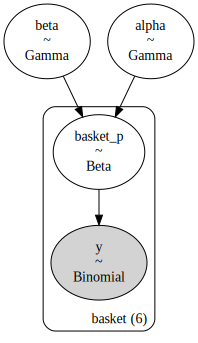

In [12]:
trial.visualise_model(analysis_name)

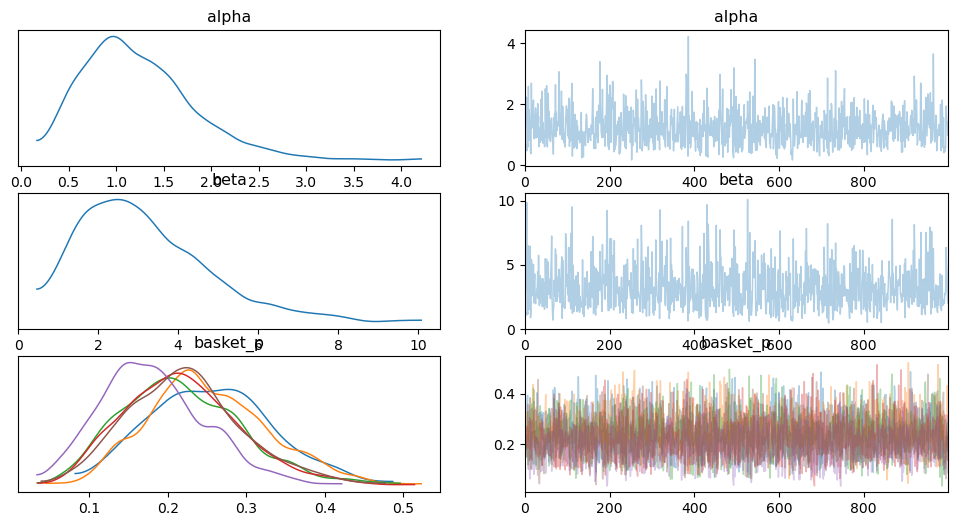

In [13]:
trial.plot_trace(analysis_name, -1)

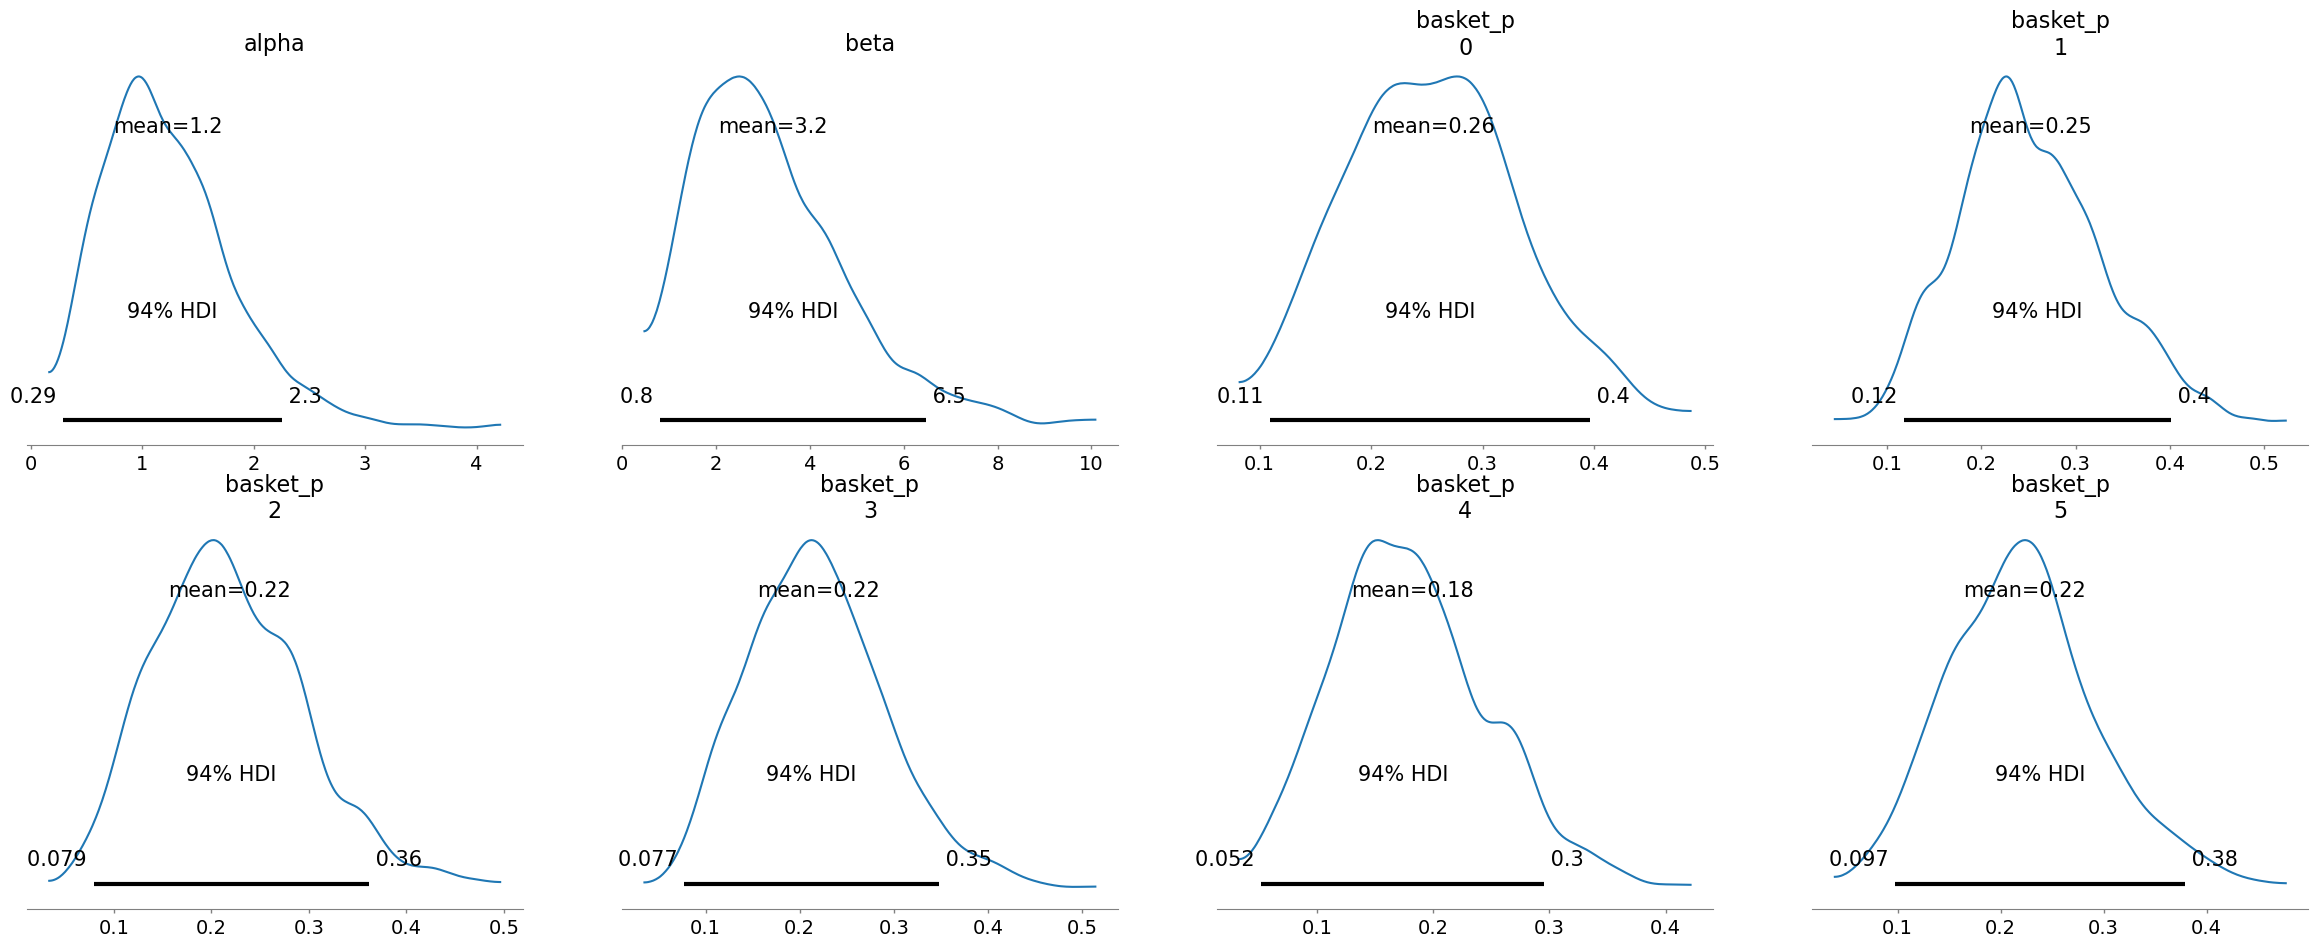

In [14]:
trial.plot_posterior(analysis_name, -1)

In [15]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,6,24
1,COMPLETED_INEFFECTIVE,6,24
2,COMPLETED_INEFFECTIVE,5,24
3,COMPLETED_INEFFECTIVE,5,24
4,COMPLETED_INEFFECTIVE,4,24
5,COMPLETED_INEFFECTIVE,5,24


### BHM

In [16]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

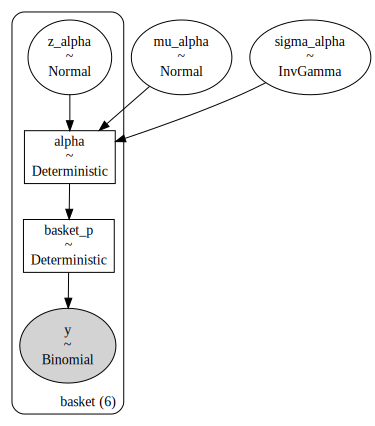

In [17]:
trial.visualise_model(analysis_name)

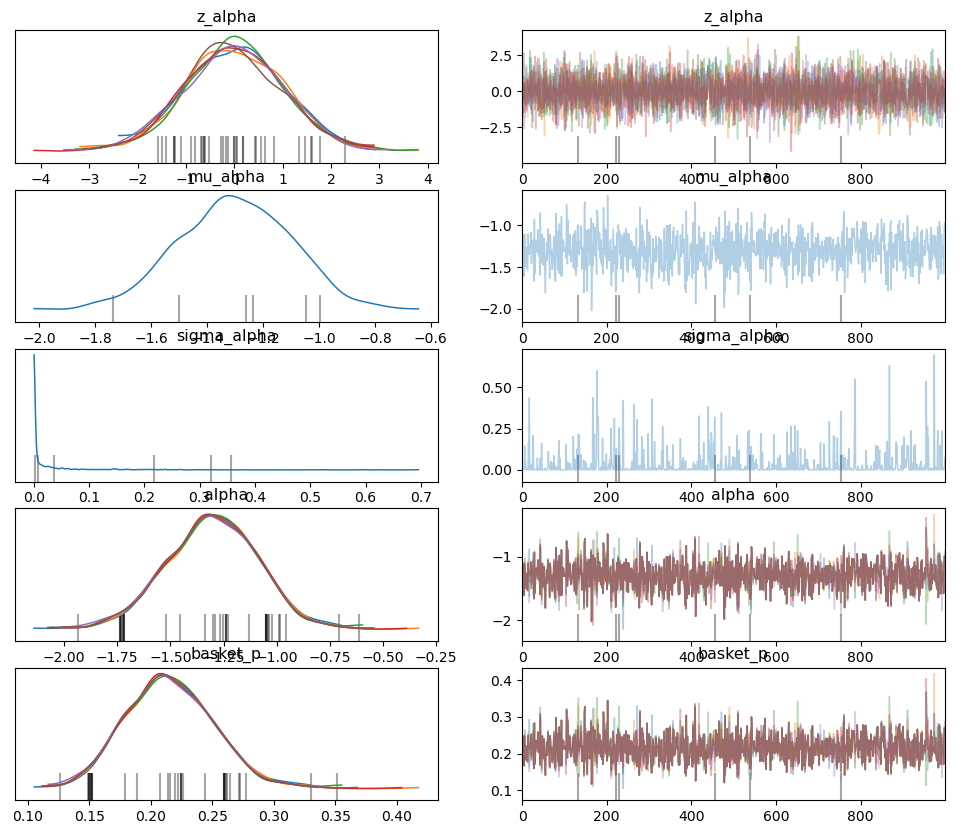

In [18]:
trial.plot_trace(analysis_name, -1)

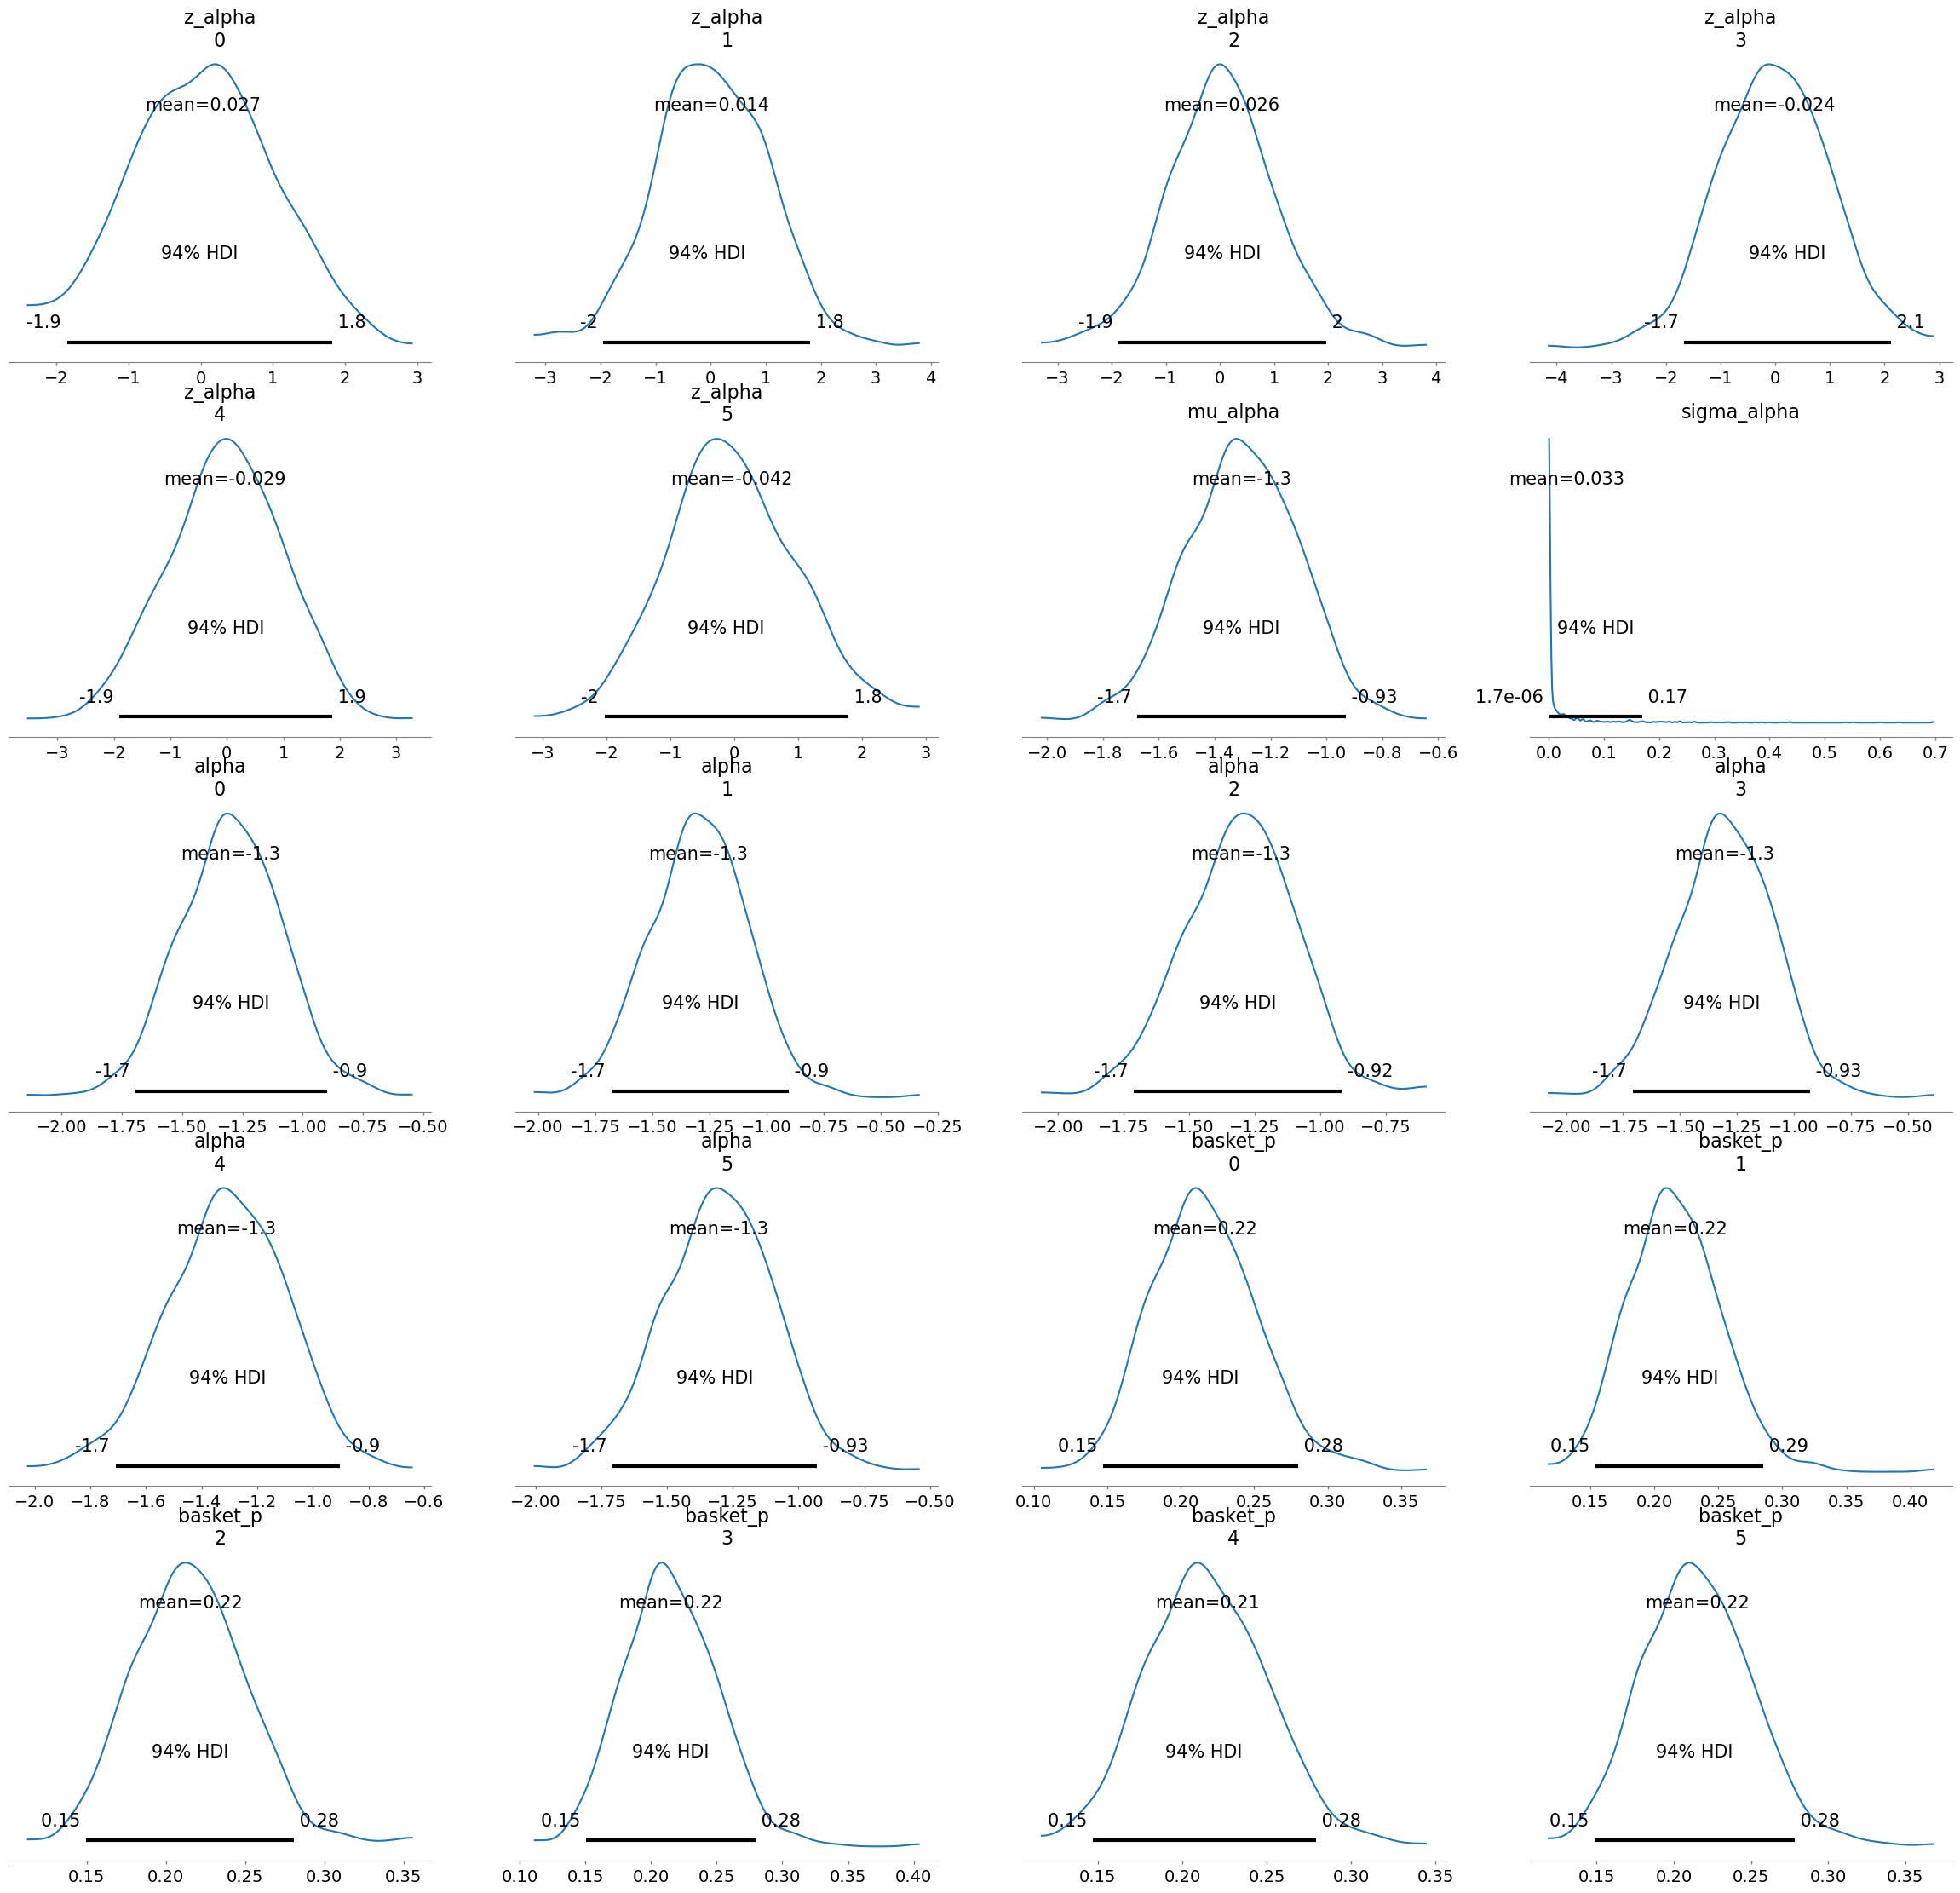

In [19]:
trial.plot_posterior(analysis_name, -1)

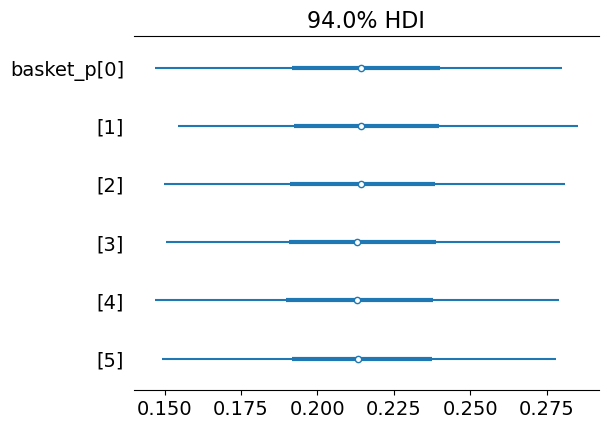

In [20]:
trial.plot_forest(analysis_name, -1)

In [21]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,6,24
1,COMPLETED_INEFFECTIVE,6,24
2,COMPLETED_INEFFECTIVE,5,24
3,COMPLETED_INEFFECTIVE,5,24
4,COMPLETED_INEFFECTIVE,4,24
5,COMPLETED_INEFFECTIVE,5,24
